## Import libraries

In [1]:
import gc
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

## Prepare data

In [2]:
with open("../input/workation-price-prediction-preprocess-data/Workation_Dataset.txt", 'rb') as handle: 
    data = handle.read()

processed_data = pickle.loads(data)
train_df = processed_data['train_df']
test_df = processed_data['test_df']

train_df = train_df[~((train_df['Per Person Price'] < 7.3) | (np.exp(train_df['Per Person Price']) > 150000))].copy()

del processed_data
gc.collect()

31

In [3]:
ds = np.load('../input/workation-price-prediction-lgb/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb1, oof_score_lgb1, y_pred_final_lgb1 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/workation-price-prediction-lgb-v2/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb2, oof_score_lgb2, y_pred_final_lgb2 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/workation-price-prediction-lgb-v3/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb3, oof_score_lgb3, y_pred_final_lgb3 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/workation-price-prediction-lgb-v4/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb4, oof_score_lgb4, y_pred_final_lgb4 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/workation-price-prediction-xgb/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb1, oof_score_xgb1, y_pred_final_xgb1 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/workation-price-prediction-xgb-v2/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb2, oof_score_xgb2, y_pred_final_xgb2 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/workation-price-prediction-xgb-v3/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb3, oof_score_xgb3, y_pred_final_xgb3 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/workation-price-prediction-xgb-v4/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb4, oof_score_xgb4, y_pred_final_xgb4 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/workation-price-prediction-cb/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb1, oof_score_cb1, y_pred_final_cb1 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/workation-price-prediction-cb-v2/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb2, oof_score_cb2, y_pred_final_cb2 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/workation-price-prediction-cb-v3/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb3, oof_score_cb3, y_pred_final_cb3 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/workation-price-prediction-cb-v4/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb4, oof_score_cb4, y_pred_final_cb4 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/workation-price-prediction-dnn-v1/DNN_Meta_Features.npz', allow_pickle=True)
y_pred_meta_dnn1, oof_score_dnn1, y_pred_final_dnn1 = ds['y_pred_meta_dnn'], ds['oof_score'], ds['y_pred_final_dnn']

ds = np.load('../input/workation-price-prediction-dnn-v2/DNN_Meta_Features.npz', allow_pickle=True)
y_pred_meta_dnn2, oof_score_dnn2, y_pred_final_dnn2 = ds['y_pred_meta_dnn'], ds['oof_score'], ds['y_pred_final_dnn']

ds = np.load('../input/workation-price-prediction-dnn-v3/DNN_Meta_Features.npz', allow_pickle=True)
y_pred_meta_dnn3, oof_score_dnn3, y_pred_final_dnn3 = ds['y_pred_meta_dnn'], ds['oof_score'], ds['y_pred_final_dnn']

ds = np.load('../input/workation-price-prediction-dnn-v4/DNN_Meta_Features.npz', allow_pickle=True)
y_pred_meta_dnn4, oof_score_dnn4, y_pred_final_dnn4 = ds['y_pred_meta_dnn'], ds['oof_score'], ds['y_pred_final_dnn']

In [4]:
y_pred_meta_xgb1 = np.array([np.mean(y_pred_meta_xgb1, axis=1)]).T
y_pred_meta_lgb1 = np.array([np.mean(y_pred_meta_lgb1, axis=1)]).T
y_pred_meta_cb1 = np.array([np.mean(y_pred_meta_cb1, axis=1)]).T
y_pred_meta_dnn1 = np.array([np.mean(y_pred_meta_dnn1, axis=1)]).T

y_pred_meta_xgb2 = np.array([np.mean(y_pred_meta_xgb2, axis=1)]).T
y_pred_meta_lgb2 = np.array([np.mean(y_pred_meta_lgb2, axis=1)]).T
y_pred_meta_cb2 = np.array([np.mean(y_pred_meta_cb2, axis=1)]).T
y_pred_meta_dnn2 = np.array([np.mean(y_pred_meta_dnn2, axis=1)]).T

y_pred_meta_xgb3 = np.array([np.mean(y_pred_meta_xgb3, axis=1)]).T
y_pred_meta_lgb3 = np.array([np.mean(y_pred_meta_lgb3, axis=1)]).T
y_pred_meta_cb3 = np.array([np.mean(y_pred_meta_cb3, axis=1)]).T
y_pred_meta_dnn3 = np.array([np.mean(y_pred_meta_dnn3, axis=1)]).T

y_pred_meta_xgb4 = np.array([np.mean(y_pred_meta_xgb4, axis=1)]).T
y_pred_meta_lgb4 = np.array([np.mean(y_pred_meta_lgb4, axis=1)]).T
y_pred_meta_cb4 = np.array([np.mean(y_pred_meta_cb4, axis=1)]).T
y_pred_meta_dnn4 = np.array([np.mean(y_pred_meta_dnn4, axis=1)]).T

In [5]:
y_pred_final_xgb1 = np.array([np.mean(y_pred_final_xgb1, axis=1)]).T
y_pred_final_lgb1 = np.array([np.mean(y_pred_final_lgb1, axis=1)]).T
y_pred_final_cb1 = np.array([np.mean(y_pred_final_cb1, axis=1)]).T
y_pred_final_dnn1 = np.array([np.mean(y_pred_final_dnn1, axis=1)]).T

y_pred_final_xgb2 = np.array([np.mean(y_pred_final_xgb2, axis=1)]).T
y_pred_final_lgb2 = np.array([np.mean(y_pred_final_lgb2, axis=1)]).T
y_pred_final_cb2 = np.array([np.mean(y_pred_final_cb2, axis=1)]).T
y_pred_final_dnn2 = np.array([np.mean(y_pred_final_dnn2, axis=1)]).T

y_pred_final_xgb3 = np.array([np.mean(y_pred_final_xgb3, axis=1)]).T
y_pred_final_lgb3 = np.array([np.mean(y_pred_final_lgb3, axis=1)]).T
y_pred_final_cb3 = np.array([np.mean(y_pred_final_cb3, axis=1)]).T
y_pred_final_dnn3 = np.array([np.mean(y_pred_final_dnn3, axis=1)]).T

y_pred_final_xgb4 = np.array([np.mean(y_pred_final_xgb4, axis=1)]).T
y_pred_final_lgb4 = np.array([np.mean(y_pred_final_lgb4, axis=1)]).T
y_pred_final_cb4 = np.array([np.mean(y_pred_final_cb4, axis=1)]).T
y_pred_final_dnn4 = np.array([np.mean(y_pred_final_dnn4, axis=1)]).T

In [6]:
Xtrain_meta = np.concatenate((y_pred_meta_cb1, y_pred_meta_cb2, y_pred_meta_cb3, y_pred_meta_cb4, 
                              y_pred_meta_lgb1, y_pred_meta_lgb2, y_pred_meta_lgb3, y_pred_meta_lgb4, 
                              y_pred_meta_xgb1, y_pred_meta_xgb2, y_pred_meta_xgb3, y_pred_meta_xgb4, 
                              y_pred_meta_dnn1, y_pred_meta_dnn2, y_pred_meta_dnn3, y_pred_meta_dnn4), 
                             axis=1)
Ytrain_meta = train_df['Per Person Price'].values
Ytrain_strat = pd.qcut(train_df['Per Person Price'].values, q=7, labels=range(0,7))
Xtest_meta = np.concatenate((y_pred_final_cb1, y_pred_final_cb2, y_pred_final_cb3, y_pred_final_cb4, 
                             y_pred_final_lgb1, y_pred_final_lgb2, y_pred_final_lgb3, y_pred_final_lgb4, 
                             y_pred_final_xgb1, y_pred_final_xgb2, y_pred_final_xgb3, y_pred_final_xgb4, 
                             y_pred_final_dnn1, y_pred_final_dnn2, y_pred_final_dnn3, y_pred_final_dnn4), 
                            axis=1)

print("Xtrain_meta shape: {}".format(Xtrain_meta.shape))
print("Ytrain_meta shape: {}".format(Ytrain_meta.shape))
print("Xtest_meta shape: {}".format(Xtest_meta.shape))

Xtrain_meta shape: (20989, 16)
Ytrain_meta shape: (20989,)
Xtest_meta shape: (9000, 16)


<AxesSubplot:ylabel='Count'>

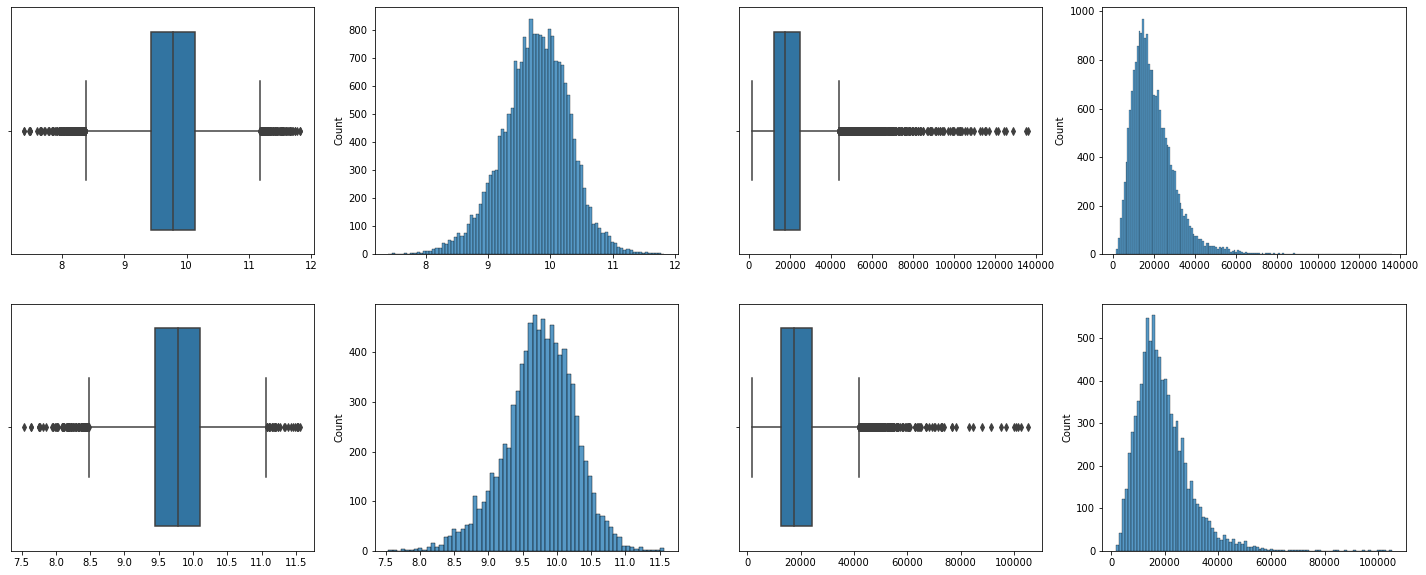

In [7]:
y_pred = np.mean(Xtest_meta, axis=1)

_, ax = plt.subplots(2, 4, figsize=(25, 10))
sns.boxplot(x=Ytrain_meta, ax=ax[0][0])
sns.histplot(x=Ytrain_meta, ax=ax[0][1])
sns.boxplot(x=np.exp(Ytrain_meta), ax=ax[0][2])
sns.histplot(x=np.exp(Ytrain_meta), ax=ax[0][3])
sns.boxplot(x=y_pred, ax=ax[1][0])
sns.histplot(x=y_pred, ax=ax[1][1])
sns.boxplot(x=np.exp(y_pred), ax=ax[1][2])
sns.histplot(x=np.exp(y_pred), ax=ax[1][3])

## Base Models Performance

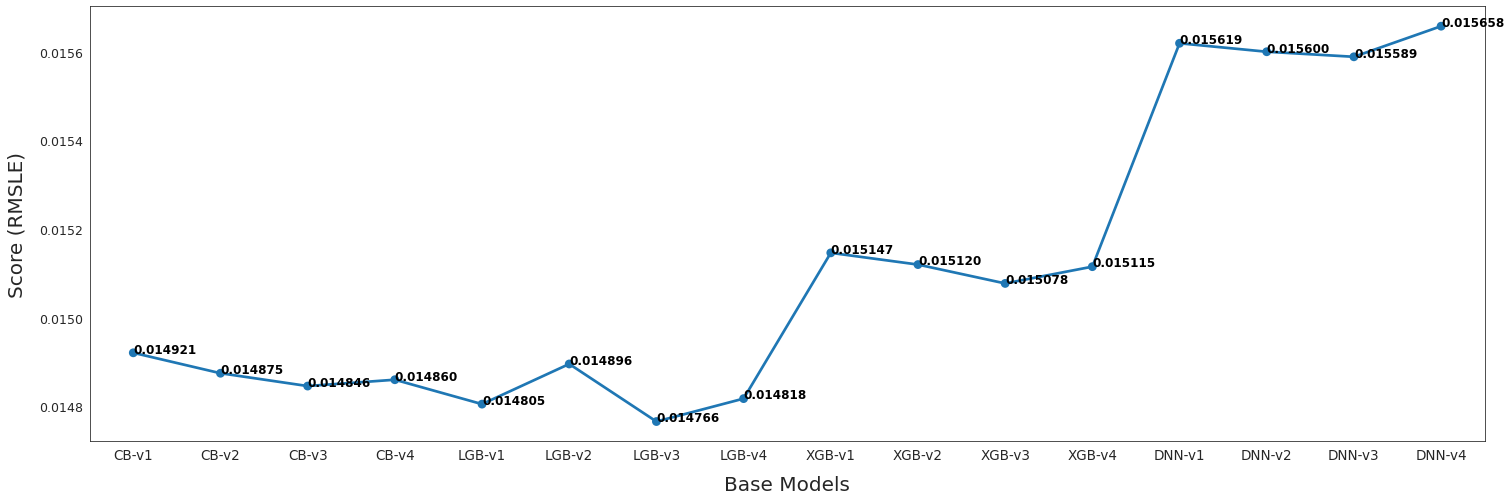

In [8]:
scores={
    'CB-v1': float(oof_score_cb1),
    'CB-v2': float(oof_score_cb2),
    'CB-v3': float(oof_score_cb3),
    'CB-v4': float(oof_score_cb4),
    'LGB-v1': float(oof_score_lgb1),
    'LGB-v2': float(oof_score_lgb2),
    'LGB-v3': float(oof_score_lgb3),
    'LGB-v4': float(oof_score_lgb4),
    'XGB-v1': float(oof_score_xgb1),
    'XGB-v2': float(oof_score_xgb2),
    'XGB-v3': float(oof_score_xgb3),
    'XGB-v4': float(oof_score_xgb4),
    'DNN-v1': float(oof_score_dnn1),
    'DNN-v2': float(oof_score_dnn2),
    'DNN-v3': float(oof_score_dnn3),
    'DNN-v4': float(oof_score_dnn4)
}

sns.set_style("white")
fig = plt.figure(figsize=(25, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score in list(scores.values())], markers=['o'], linestyles=['-'])
for i, score in enumerate(list(scores.values())):
    ax.text(i, score, '{:.6f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSLE)', size=20, labelpad=12.5)
plt.xlabel('Base Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.show()

## Linear Regression

In [9]:
FOLD = 7
NUM_SEED = 5

np.random.seed(3)
seeds = np.random.randint(0, 100, size=NUM_SEED)

oof_score = 0
y_pred_final_lr = 0
counter = 0


for sidx, seed in enumerate(seeds):
    seed_score = 0
    
    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = LinearRegression()

        model.fit(train_x, train_y)

        y_pred = model.predict(val_x)
        y_pred_final_lr += model.predict(Xtest_meta)
        
        score = np.sqrt(mean_squared_log_error(val_y, y_pred))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))


y_pred_final_lr = y_pred_final_lr / float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-24 | Fold-0 | OOF Score: 0.014173190030465225
Seed-24 | Fold-1 | OOF Score: 0.014336785016522371
Seed-24 | Fold-2 | OOF Score: 0.014582432078021575
Seed-24 | Fold-3 | OOF Score: 0.01407213617453337
Seed-24 | Fold-4 | OOF Score: 0.014383469519479072
Seed-24 | Fold-5 | OOF Score: 0.014547281054342949
Seed-24 | Fold-6 | OOF Score: 0.014572733877026069

Seed: 24 | Aggregate OOF Score: 0.014381146821484376


Seed-3 | Fold-0 | OOF Score: 0.01436859607319517
Seed-3 | Fold-1 | OOF Score: 0.013994371332848974
Seed-3 | Fold-2 | OOF Score: 0.014175124739466893
Seed-3 | Fold-3 | OOF Score: 0.01411155381411262
Seed-3 | Fold-4 | OOF Score: 0.01540496032234079
Seed-3 | Fold-5 | OOF Score: 0.01391699720460493
Seed-3 | Fold-6 | OOF Score: 0.014669669085268101

Seed: 3 | Aggregate OOF Score: 0.014377324653119639


Seed-56 | Fold-0 | OOF Score: 0.014940381697977618
Seed-56 | Fold-1 | OOF Score: 0.013994357282746967
Seed-56 | Fold-2 | OOF Score: 0.014944134980630052
Seed-56 | Fold-3 | OOF Score: 0.01

## ElasticNet

In [10]:
FOLD = 7
NUM_SEED = 5

np.random.seed(3)
seeds = np.random.randint(0, 100, size=NUM_SEED)

oof_score = 0
y_pred_final_enet = 0
counter = 0


for sidx, seed in enumerate(seeds):
    seed_score = 0
    
    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = ElasticNet(alpha=0.0005, max_iter=3000, random_state=0)

        model.fit(train_x, train_y)

        y_pred = model.predict(val_x)
        y_pred_final_enet += model.predict(Xtest_meta)
        
        score = np.sqrt(mean_squared_log_error(val_y, y_pred))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))


y_pred_final_enet = y_pred_final_enet / float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-24 | Fold-0 | OOF Score: 0.014210923030175168
Seed-24 | Fold-1 | OOF Score: 0.0143208492817973
Seed-24 | Fold-2 | OOF Score: 0.014610496288021402
Seed-24 | Fold-3 | OOF Score: 0.014062889416597004
Seed-24 | Fold-4 | OOF Score: 0.014387126330532915
Seed-24 | Fold-5 | OOF Score: 0.014523509354227469
Seed-24 | Fold-6 | OOF Score: 0.014580480207738838

Seed: 24 | Aggregate OOF Score: 0.014385181987012871


Seed-3 | Fold-0 | OOF Score: 0.014331350378128084
Seed-3 | Fold-1 | OOF Score: 0.014008317721236013
Seed-3 | Fold-2 | OOF Score: 0.014195458208100456
Seed-3 | Fold-3 | OOF Score: 0.014086873799475532
Seed-3 | Fold-4 | OOF Score: 0.015428118029332461
Seed-3 | Fold-5 | OOF Score: 0.013899764135951377
Seed-3 | Fold-6 | OOF Score: 0.014673341416034501

Seed: 3 | Aggregate OOF Score: 0.014374746241179775


Seed-56 | Fold-0 | OOF Score: 0.014948876188224325
Seed-56 | Fold-1 | OOF Score: 0.013967771176364439
Seed-56 | Fold-2 | OOF Score: 0.014940532255622863
Seed-56 | Fold-3 | OOF Score: 0

## Lasso

In [11]:
FOLD = 7
NUM_SEED = 5

np.random.seed(3)
seeds = np.random.randint(0, 100, size=NUM_SEED)

oof_score = 0
y_pred_final_lasso = 0
counter = 0


for sidx, seed in enumerate(seeds):
    seed_score = 0
    
    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = Lasso(alpha=0.0005, max_iter=3000, random_state=0)

        model.fit(train_x, train_y)

        y_pred = model.predict(val_x)
        y_pred_final_lasso += model.predict(Xtest_meta)
        
        score = np.sqrt(mean_squared_log_error(val_y, y_pred))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))


y_pred_final_lasso = y_pred_final_lasso / float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-24 | Fold-0 | OOF Score: 0.014205937463742335
Seed-24 | Fold-1 | OOF Score: 0.014333318066263832
Seed-24 | Fold-2 | OOF Score: 0.014605926936786934
Seed-24 | Fold-3 | OOF Score: 0.014061071471967303
Seed-24 | Fold-4 | OOF Score: 0.014386085456612949
Seed-24 | Fold-5 | OOF Score: 0.014534433598150901
Seed-24 | Fold-6 | OOF Score: 0.014575966449069203

Seed: 24 | Aggregate OOF Score: 0.01438610563465621


Seed-3 | Fold-0 | OOF Score: 0.014329109056802201
Seed-3 | Fold-1 | OOF Score: 0.014007374979712122
Seed-3 | Fold-2 | OOF Score: 0.014198191227071841
Seed-3 | Fold-3 | OOF Score: 0.014082689856535187
Seed-3 | Fold-4 | OOF Score: 0.01543301366038471
Seed-3 | Fold-5 | OOF Score: 0.013894444613233381
Seed-3 | Fold-6 | OOF Score: 0.014673440372045024

Seed: 3 | Aggregate OOF Score: 0.014374037680826355


Seed-56 | Fold-0 | OOF Score: 0.014943660412856092
Seed-56 | Fold-1 | OOF Score: 0.013968360188304881
Seed-56 | Fold-2 | OOF Score: 0.014952683120053855
Seed-56 | Fold-3 | OOF Score: 0

## Voting Regressor

In [12]:
FOLD = 7
NUM_SEED = 5

np.random.seed(3)
seeds = np.random.randint(0, 100, size=NUM_SEED)

oof_score = 0
y_pred_final_vr = 0
counter = 0


for sidx, seed in enumerate(seeds):
    seed_score = 0
    
    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]
        
        lr = LinearRegression()
        enet = ElasticNet(alpha=0.0005, max_iter=3000, random_state=0)
        lasso = Lasso(alpha=0.0005, max_iter=3000, random_state=0)
        
        model = VotingRegressor([('lr', lr), 
                                 ('enet', enet),
                                 ('lasso', lasso)],
                                weights=[2,1,1])

        model.fit(train_x, train_y)

        y_pred = model.predict(val_x)
        y_pred_final_vr += model.predict(Xtest_meta)
        
        score = np.sqrt(mean_squared_log_error(val_y, y_pred))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))


y_pred_final_vr = y_pred_final_vr / float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-24 | Fold-0 | OOF Score: 0.014186675186177104
Seed-24 | Fold-1 | OOF Score: 0.014325787011482865
Seed-24 | Fold-2 | OOF Score: 0.014590553601677127
Seed-24 | Fold-3 | OOF Score: 0.01406108754612809
Seed-24 | Fold-4 | OOF Score: 0.014379905953712835
Seed-24 | Fold-5 | OOF Score: 0.014531202382875034
Seed-24 | Fold-6 | OOF Score: 0.014570544658219298

Seed: 24 | Aggregate OOF Score: 0.014377965191467477


Seed-3 | Fold-0 | OOF Score: 0.01434247285449953
Seed-3 | Fold-1 | OOF Score: 0.013996185476926605
Seed-3 | Fold-2 | OOF Score: 0.014181730721827712
Seed-3 | Fold-3 | OOF Score: 0.01409141225781377
Seed-3 | Fold-4 | OOF Score: 0.015413772586255571
Seed-3 | Fold-5 | OOF Score: 0.013900505110077557
Seed-3 | Fold-6 | OOF Score: 0.01466580133917301

Seed: 3 | Aggregate OOF Score: 0.01437026862093911


Seed-56 | Fold-0 | OOF Score: 0.014937734383186345
Seed-56 | Fold-1 | OOF Score: 0.0139742162439884
Seed-56 | Fold-2 | OOF Score: 0.014940265106726679
Seed-56 | Fold-3 | OOF Score: 0.0142

## Create submission file

In [13]:
submit_df = pd.DataFrame()
submit_df['Per Person Price'] = np.exp(y_pred_final_lr)
submit_df.to_csv("./LR_submission.csv", index=False)
submit_df.head()

,Per Person Price
0,19352.399632
1,11371.583631
2,5640.135981
3,7118.514422
4,21406.235768


In [14]:
submit_df = pd.DataFrame()
submit_df['Per Person Price'] = np.exp(y_pred_final_enet)
submit_df.to_csv("./ENet_submission.csv", index=False)
submit_df.head()

,Per Person Price
0,19197.185013
1,11297.862004
2,5590.672014
3,7115.721163
4,21413.291866


In [15]:
submit_df = pd.DataFrame()
submit_df['Per Person Price'] = np.exp(y_pred_final_lasso)
submit_df.to_csv("./Lasso_submission.csv", index=False)
submit_df.head()

,Per Person Price
0,19211.573891
1,11307.057331
2,5590.256946
3,7123.163957
4,21409.404844


In [16]:
submit_df = pd.DataFrame()
submit_df['Per Person Price'] = np.exp(y_pred_final_vr)
submit_df.to_csv("./VR_submission.csv", index=False)
submit_df.head()

,Per Person Price
0,19278.246802
1,11336.968497
2,5615.245306
3,7118.977990
4,21408.791865


In [17]:
y_pred_final = (y_pred_final_lr * 0.3) + \
               (y_pred_final_enet * 0.2) + \
               (y_pred_final_lasso * 0.2) + \
               (y_pred_final_vr * 0.3)

submit_df = pd.DataFrame()
submit_df['Per Person Price'] = np.exp(y_pred_final)
submit_df.to_csv("./BLEND_submission.csv", index=False)
submit_df.head()

,Per Person Price
0,19270.847164
1,11333.512785
2,5612.762288
3,7119.024348
4,21409.047491
